Nama Anggota :
1. Anisa Khaynun Najwa (23031554007)

2. Thea Bayu Revalina (23031554035)

3. Metha Nailis Saadah (23031554159)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pytesseract
!pip install easyocr

# **LOAD DATA**

Eksplorasi Jumlah Gambar per Kelas:
  - Z: 501 gambar
  - S: 501 gambar
  - X: 501 gambar
  - R: 501 gambar
  - Y: 501 gambar
  - Q: 501 gambar
  - U: 501 gambar
  - V: 501 gambar
  - T: 501 gambar
  - W: 501 gambar
  - M: 501 gambar
  - H: 501 gambar
  - L: 501 gambar
  - G: 501 gambar
  - P: 501 gambar
  - O: 501 gambar
  - N: 501 gambar
  - J: 501 gambar
  - I: 501 gambar
  - K: 501 gambar
  - F: 501 gambar
  - D: 501 gambar
  - C: 501 gambar
  - E: 506 gambar
  - B: 501 gambar
  - A: 501 gambar


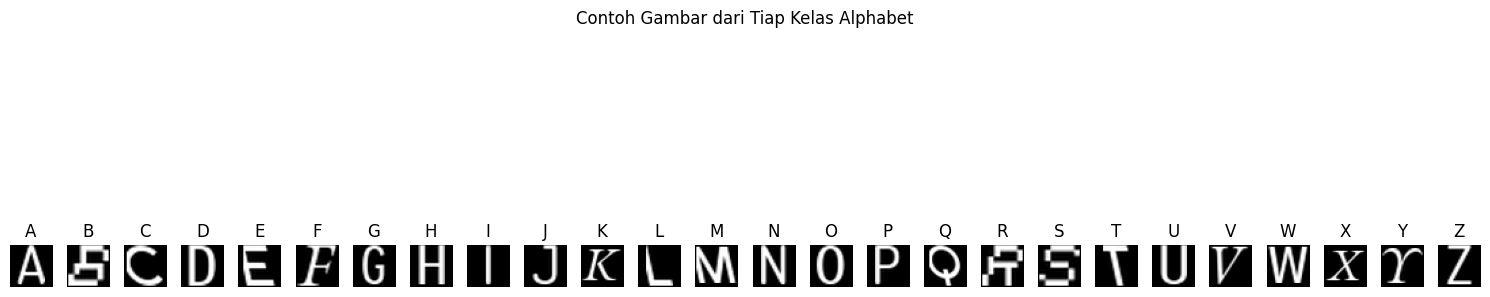


Statistik Ukuran Gambar:
  - Rata-rata ukuran: 32.0 x 32.0
  - Ukuran minimum: 32 x 32
  - Ukuran maksimum: 32 x 32


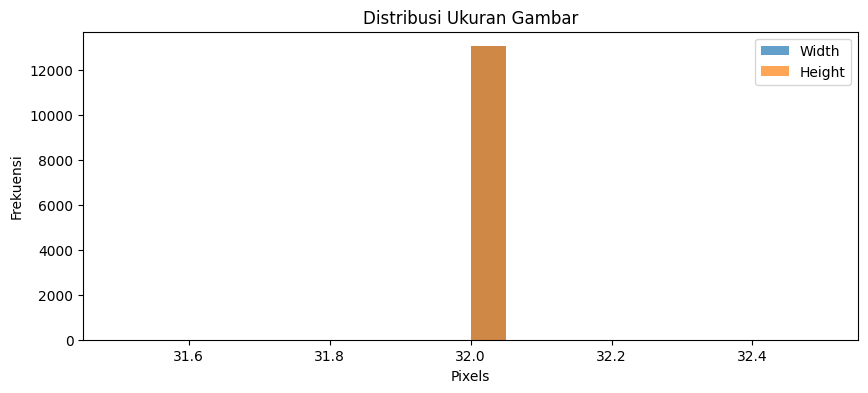

In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

dataset_path = '/content/drive/MyDrive/image_pcd/Alphabet'

print("Eksplorasi Jumlah Gambar per Kelas:")
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        count = len(os.listdir(class_dir))
        class_counts[class_name] = count
        print(f"  - {class_name}: {count} gambar")

def show_sample_images(dataset_path, class_counts):
    classes_with_images = [class_name for class_name, count in sorted(class_counts.items()) if count > 0]
    if not classes_with_images:
        print("Tidak ada kelas dengan gambar untuk ditampilkan.")
        return

    fig, axes = plt.subplots(1, len(classes_with_images), figsize=(15, 5))

    if len(classes_with_images) == 1:
        axes = [axes]

    for i, class_name in enumerate(classes_with_images):
        class_dir = os.path.join(dataset_path, class_name)
        image_list = os.listdir(class_dir)
        if image_list:
            first_image = image_list[0]
            img_path = os.path.join(class_dir, first_image)
            try:
                image = Image.open(img_path)
                axes[i].imshow(image, cmap='gray')
                axes[i].set_title(class_name)
                axes[i].axis('off')
            except Exception as e:
                print(f"Gagal membuka atau menampilkan gambar dari {img_path}: {e}")
        else:
            print(f"Kelas '{class_name}' tidak memiliki gambar.")
            axes[i].set_title(f"{class_name} (No Image)")
            axes[i].axis('off')


    plt.suptitle("Contoh Gambar dari Tiap Kelas Alphabet")
    plt.tight_layout()
    plt.show()

show_sample_images(dataset_path, class_counts)

image_sizes = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                with Image.open(image_path) as img:
                    image_sizes.append(img.size)
            except:
                print(f"Gagal membuka {image_path}")

if image_sizes:
    widths, heights = zip(*image_sizes)
    print(f"\nStatistik Ukuran Gambar:")
    print(f"  - Rata-rata ukuran: {np.mean(widths):.1f} x {np.mean(heights):.1f}")
    print(f"  - Ukuran minimum: {min(widths)} x {min(heights)}")
    print(f"  - Ukuran maksimum: {max(widths)} x {max(heights)}")

    plt.figure(figsize=(10, 4))
    plt.hist(widths, bins=20, alpha=0.7, label='Width')
    plt.hist(heights, bins=20, alpha=0.7, label='Height')
    plt.title("Distribusi Ukuran Gambar")
    plt.xlabel("Pixels")
    plt.ylabel("Frekuensi")
    plt.legend()
    plt.show()
else:
    print("\nTidak ada data ukuran gambar untuk dianalisis.")

Jumlah gambar di folder Ocr: 6


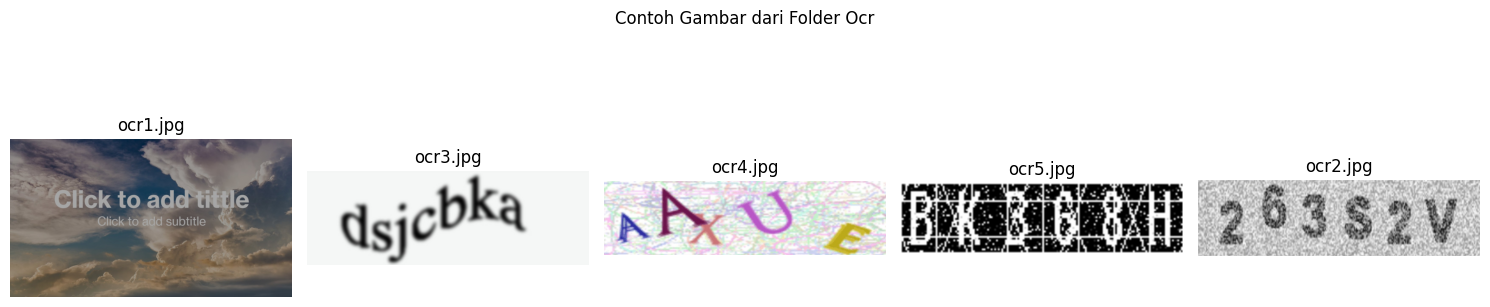


Statistik Ukuran Gambar di OCR:
  - Rata-rata ukuran: 1231.7 x 531.7
  - Ukuran minimum: 655 x 178
  - Ukuran maksimum: 2654 x 1490


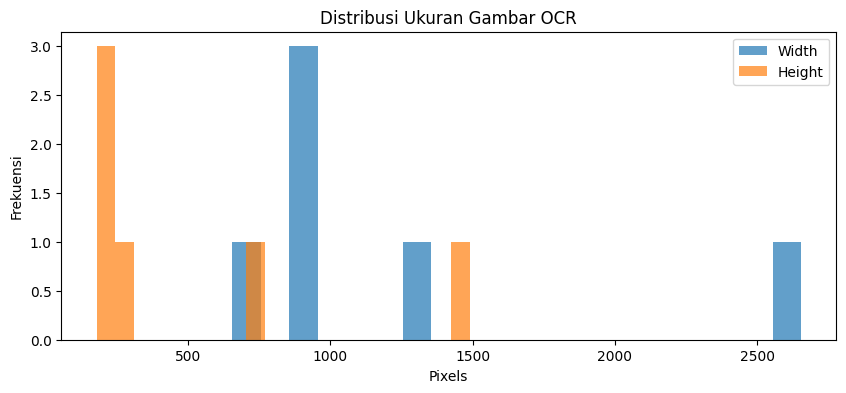

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

ocr_path = '/content/drive/MyDrive/image_pcd/Ocr'

ocr_images = [f for f in os.listdir(ocr_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(f"Jumlah gambar di folder Ocr: {len(ocr_images)}")

def show_ocr_samples(ocr_path, image_list, n=5):
    sample_images = image_list[:n]
    fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 4))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(ocr_path, img_name)
        image = Image.open(img_path)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(img_name)
        axes[i].axis('off')
    plt.suptitle("Contoh Gambar dari Folder Ocr")
    plt.tight_layout()
    plt.show()

show_ocr_samples(ocr_path, ocr_images)

ocr_sizes = []
for image_name in ocr_images:
    image_path = os.path.join(ocr_path, image_name)
    try:
        with Image.open(image_path) as img:
            ocr_sizes.append(img.size)
    except:
        print(f"Gagal membuka {image_path}")

widths, heights = zip(*ocr_sizes)
print(f"\nStatistik Ukuran Gambar di OCR:")
print(f"  - Rata-rata ukuran: {np.mean(widths):.1f} x {np.mean(heights):.1f}")
print(f"  - Ukuran minimum: {min(widths)} x {min(heights)}")
print(f"  - Ukuran maksimum: {max(widths)} x {max(heights)}")

plt.figure(figsize=(10, 4))
plt.hist(widths, bins=20, alpha=0.7, label='Width')
plt.hist(heights, bins=20, alpha=0.7, label='Height')
plt.title("Distribusi Ukuran Gambar OCR")
plt.xlabel("Pixels")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()


# **Pre - Processing Dataset**

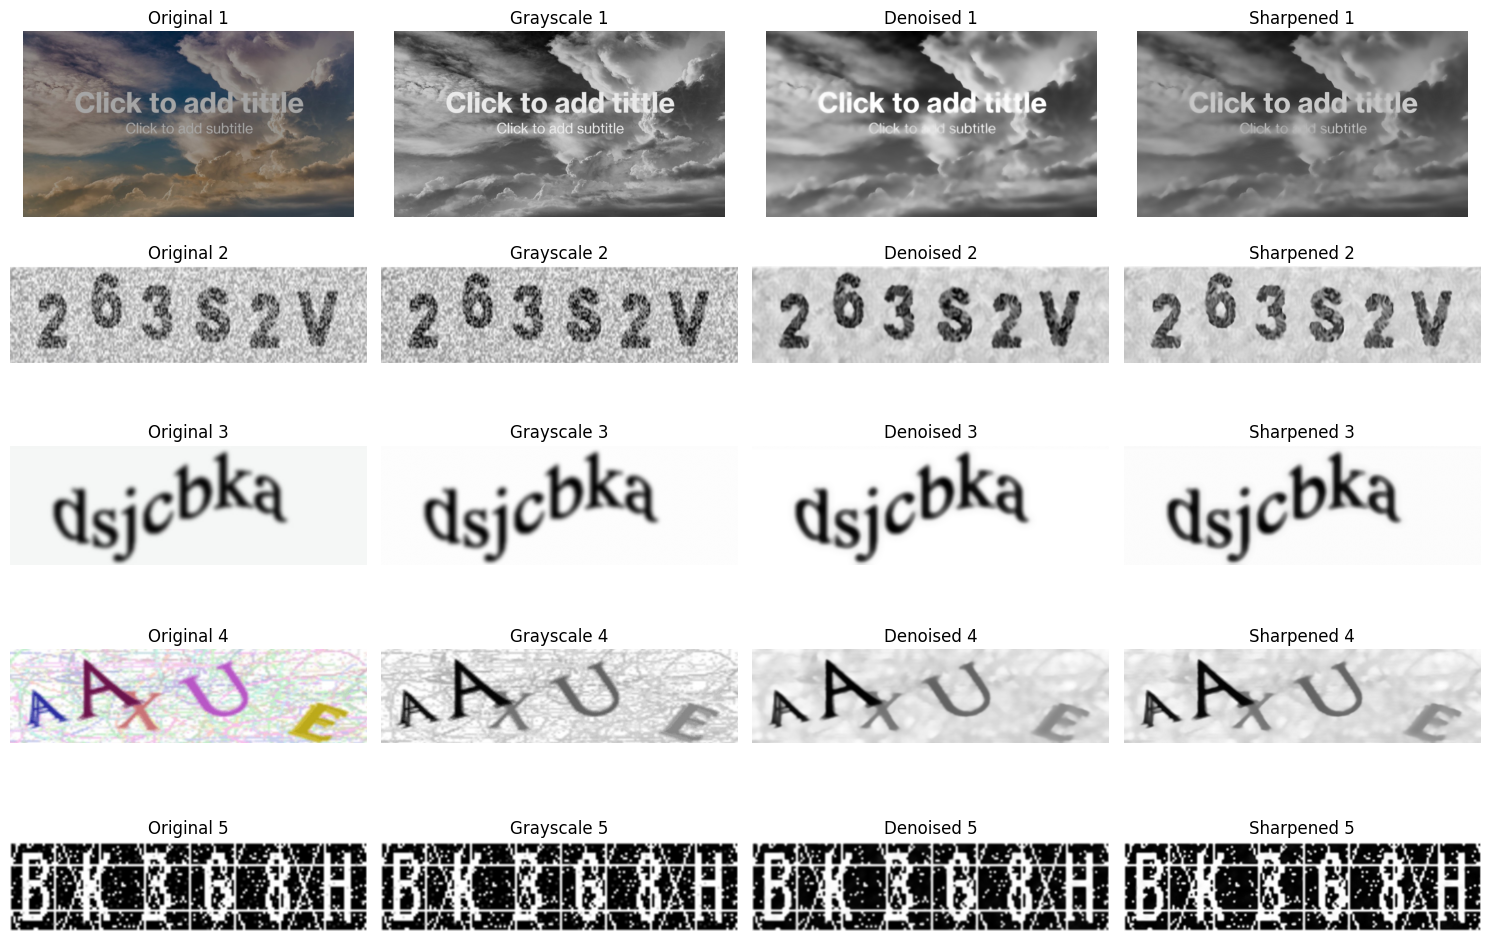

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_paths = [
    '/content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg',
    '/content/drive/MyDrive/image_pcd/Ocr/ocr2.jpg',
    '/content/drive/MyDrive/image_pcd/Ocr/ocr3.jpg',
    '/content/drive/MyDrive/image_pcd/Ocr/ocr4.jpg',
    '/content/drive/MyDrive/image_pcd/Ocr/ocr5.jpg'
]

plt.figure(figsize=(15, 10))

for i, img_path in enumerate(image_paths, 1):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue

    # grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Denoising
    denoised = cv2.fastNlMeansDenoising(gray, h=30, templateWindowSize=7, searchWindowSize=21)

    # Sharpen
    laplacian = cv2.Laplacian(denoised, cv2.CV_64F)
    sharpened = cv2.convertScaleAbs(denoised - 0.7 * laplacian)

    # final
    output_path = img_path.replace('.jpg', '_processed.jpg')
    cv2.imwrite(output_path, sharpened)

    plt.subplot(5, 4, (i-1)*4 + 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title(f'Original {i}')
    plt.axis('off')
    plt.subplot(5, 4, (i-1)*4 + 2), plt.imshow(gray, cmap='gray'), plt.title(f'Grayscale {i}')
    plt.axis('off')
    plt.subplot(5, 4, (i-1)*4 + 3), plt.imshow(denoised, cmap='gray'), plt.title(f'Denoised {i}')
    plt.axis('off')
    plt.subplot(5, 4, (i-1)*4 + 4), plt.imshow(sharpened, cmap='gray'), plt.title(f'Sharpened {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

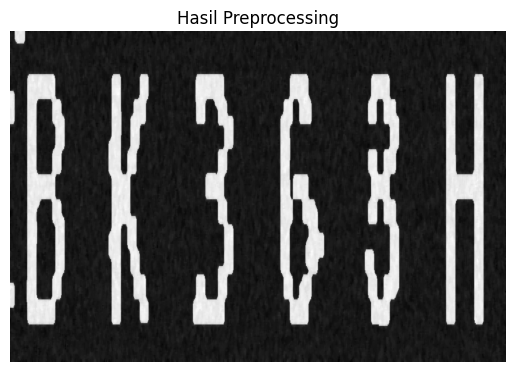

In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv.imread('/content/drive/MyDrive/image_pcd/Ocr/ocr5.jpg')
if image is None:
    raise ValueError("Image not found. Pastikan file 'ocr5.jpg' ada di direktori yang sama.")

# Grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Thresholding (Otsu)
_, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morphology: Open lalu Close
kernel = np.ones((3, 3), np.uint8)
opened = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=7)
closed = cv.morphologyEx(opened, cv.MORPH_CLOSE, kernel)

# Gaussian noise
def apply_noise_gray(image, mean=0, var=500, alpha=0.5):
    height, width = image.shape
    sigma = var ** 0.5
    noise = np.random.normal(mean, sigma, (height, width))
    noise = np.clip(128 + noise, 0, 255).astype(np.uint8)

    img = image.astype(np.float32)
    noise = noise.astype(np.float32)
    noisy_img = (1 - alpha) * img + alpha * noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

noisy = apply_noise_gray(closed)

# Median filter
median = cv.medianBlur(noisy, ksize=5)

# Resize ke ukuran tetap
def normalize_image_size(image, target_size=(1500, 1000)):
    return cv.resize(image, target_size, interpolation=cv.INTER_AREA)

preprocessed = normalize_image_size(median)

# Simpan sebagai PNG di direktori lokal
cv.imwrite('preprocessed_output.png', preprocessed)

# Tampilkan hasil
plt.imshow(preprocessed, cmap='gray')
plt.axis('off')
plt.title("Hasil Preprocessing")
plt.show()


# **Segmentasi**

## **THRESHOLD**

### **Citra 1**

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg (Threshold: 127) ===
Text: Click to add tR, Confidence: 0.65
Text: Click to, Confidence: 0.91
Text: subtitle, Confidence: 1.00
Text: dle, Confidence: 0.39

=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg (Threshold: 155) ===
Text: Click to add tittle, Confidence: 0.96
Text: Click to add subtitle, Confidence: 0.93

=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg (Threshold: 160) ===
Text: Click to add tittle, Confidence: 0.90
Text: Click to add subtitle, Confidence: 0.88


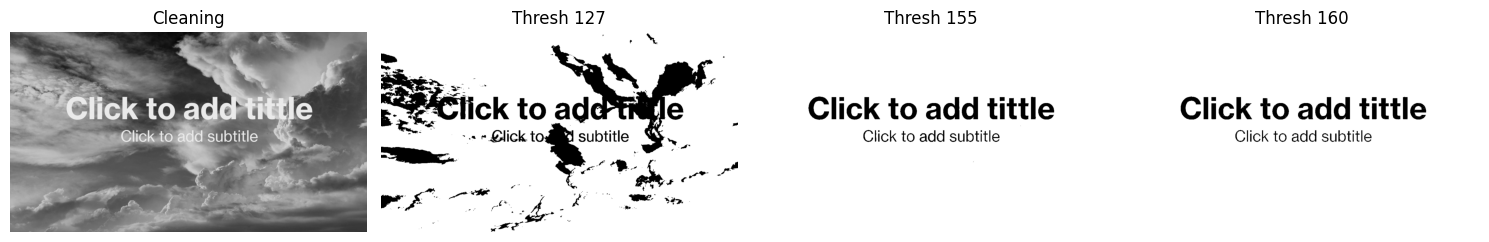

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

img_path = '/content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg'

threshold_values = [127, 155, 160]
max_value = 0

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 8))

if img is None:
    print(f"Failed to load image: {img_path}")
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.text(0.5, 0.5, 'Image Not Found', horizontalalignment='center', verticalalignment='center')
    plt.title('Cleaning')
    plt.axis('off')

    for idx in range(len(threshold_values)):
         plt.subplot(1, len(threshold_values) + 1, idx + 2)
         plt.text(0.5, 0.5, 'Processing Skipped', horizontalalignment='center', verticalalignment='center')
         plt.title(f'Thresh {threshold_values[idx]}')
         plt.axis('off')

else:
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Cleaning')
    plt.axis('off')

    for idx, threshold_value in enumerate(threshold_values, 1):
        manual_thresh = np.zeros_like(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j] > threshold_value:
                    manual_thresh[i, j] = max_value
                else:
                    manual_thresh[i, j] = 255


        output_path = img_path.replace('.jpg', f'_thresh_{threshold_value}.jpg')
        try:
            cv2.imwrite(output_path, manual_thresh)
        except Exception as e:
            print(f"Failed to save processed image {output_path}: {e}")


        plt.subplot(1, len(threshold_values) + 1, idx + 1)
        plt.imshow(manual_thresh, cmap='gray')
        plt.title(f'Thresh {threshold_value}')
        plt.axis('off')

        ocr_img = manual_thresh
        if max_value == 0:
             ocr_img = cv2.bitwise_not(manual_thresh)


        ocr_img_bgr = cv2.cvtColor(ocr_img, cv2.COLOR_GRAY2BGR)
        results = reader.readtext(ocr_img_bgr)

        print(f"\n=== OCR Hasil dari {img_path} (Threshold: {threshold_value}) ===")
        if results:
            for (bbox, text, prob) in results:
                print(f"Text: {text}, Confidence: {prob:.2f}")
        else:
            print("No text detected.")

plt.tight_layout()
plt.show()


=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg (Threshold: 127) ===
Text: Click to add tR, Confidence: 0.65
Text: Click to, Confidence: 0.91
Text: subtitle, Confidence: 1.00
Text: dle, Confidence: 0.39

=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg (Threshold: 155) ===
Text: Click to add tittle, Confidence: 0.96
Text: Click to add subtitle, Confidence: 0.93

=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg (Threshold: 160) ===
Text: Click to add tittle, Confidence: 0.90
Text: Click to add subtitle, Confidence: 0.88


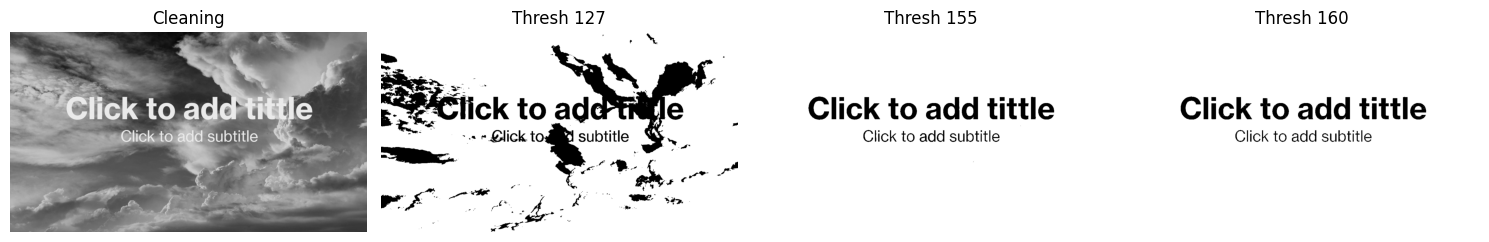

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

img_path = '/content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg'

threshold_values = [127, 155, 160]
max_value = 0

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 8))

if img is None:
    print(f"Failed to load image: {img_path}")
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.text(0.5, 0.5, 'Image Not Found', horizontalalignment='center', verticalalignment='center')
    plt.title('Cleaning')
    plt.axis('off')

    for idx in range(len(threshold_values)):
        plt.subplot(1, len(threshold_values) + 1, idx + 2)
        plt.text(0.5, 0.5, 'Processing Skipped', horizontalalignment='center', verticalalignment='center')
        plt.title(f'Thresh {threshold_values[idx]}')
        plt.axis('off')

else:
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Cleaning')
    plt.axis('off')

    for idx, threshold_value in enumerate(threshold_values, 1):
        manual_thresh = np.zeros_like(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j] > threshold_value:
                    manual_thresh[i, j] = max_value
                else:
                    manual_thresh[i, j] = 255

        output_path = img_path.replace('.jpg', f'_thresh_{threshold_value}.jpg')
        try:
            cv2.imwrite(output_path, manual_thresh)
        except Exception as e:
            print(f"Failed to save processed image {output_path}: {e}")

        if threshold_value == 155:
            cv2.imwrite('saved_thresh1_155.jpg', manual_thresh)

        plt.subplot(1, len(threshold_values) + 1, idx + 1)
        plt.imshow(manual_thresh, cmap='gray')
        plt.title(f'Thresh {threshold_value}')
        plt.axis('off')

        ocr_img = manual_thresh
        if max_value == 0:
            ocr_img = cv2.bitwise_not(manual_thresh)

        ocr_img_bgr = cv2.cvtColor(ocr_img, cv2.COLOR_GRAY2BGR)
        results = reader.readtext(ocr_img_bgr)

        print(f"\n=== OCR Hasil dari {img_path} (Threshold: {threshold_value}) ===")
        if results:
            for (bbox, text, prob) in results:
                print(f"Text: {text}, Confidence: {prob:.2f}")
        else:
            print("No text detected.")

plt.tight_layout()
plt.show()


### **Citra 2**


=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr2.jpg (Threshold: 127) ===
Text: 2 6 3 $ =, Confidence: 0.67

=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr2.jpg (Threshold: 155) ===
Text: 2 6 3 $ 2V, Confidence: 0.60

=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr2.jpg (Threshold: 160) ===
Text: 2 6 3 82V, Confidence: 0.61


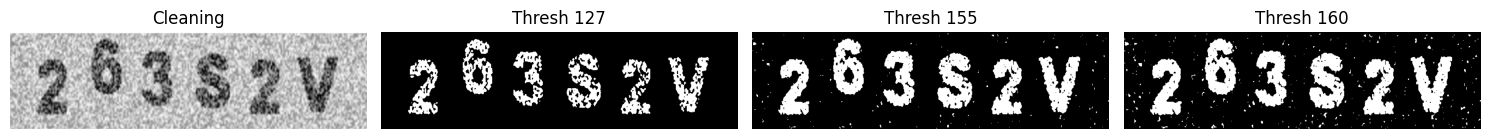

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

img_path = '/content/drive/MyDrive/image_pcd/Ocr/ocr2.jpg'

threshold_values = [127, 155, 160]
max_value = 0

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 8))

if img is None:
    print(f"Failed to load image: {img_path}")
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.text(0.5, 0.5, 'Image Not Found', horizontalalignment='center', verticalalignment='center')
    plt.title('Cleaning')
    plt.axis('off')

    for idx in range(len(threshold_values)):
        plt.subplot(1, len(threshold_values) + 1, idx + 2)
        plt.text(0.5, 0.5, 'Processing Skipped', horizontalalignment='center', verticalalignment='center')
        plt.title(f'Thresh {threshold_values[idx]}')
        plt.axis('off')

else:
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Cleaning')
    plt.axis('off')

    for idx, threshold_value in enumerate(threshold_values, 1):
        manual_thresh = np.zeros_like(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j] > threshold_value:
                    manual_thresh[i, j] = max_value
                else:
                    manual_thresh[i, j] = 255

        output_path = img_path.replace('.jpg', f'_thresh_{threshold_value}.jpg')
        try:
            cv2.imwrite(output_path, manual_thresh)
        except Exception as e:
            print(f"Failed to save processed image {output_path}: {e}")

        if threshold_value == 160:
            cv2.imwrite('saved_thresh2_160.jpg', manual_thresh)

        plt.subplot(1, len(threshold_values) + 1, idx + 1)
        plt.imshow(manual_thresh, cmap='gray')
        plt.title(f'Thresh {threshold_value}')
        plt.axis('off')

        ocr_img = manual_thresh
        if max_value == 0:
            ocr_img = cv2.bitwise_not(manual_thresh)

        ocr_img_bgr = cv2.cvtColor(ocr_img, cv2.COLOR_GRAY2BGR)
        results = reader.readtext(ocr_img_bgr)

        print(f"\n=== OCR Hasil dari {img_path} (Threshold: {threshold_value}) ===")
        if results:
            for (bbox, text, prob) in results:
                print(f"Text: {text}, Confidence: {prob:.2f}")
        else:
            print("No text detected.")

plt.tight_layout()
plt.show()


### **Citra 3**


=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr3.jpg (Threshold: 127) ===
Text: dsjcbka, Confidence: 1.00

=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr3.jpg (Threshold: 155) ===
Text: dsjcbka, Confidence: 1.00

=== OCR Hasil dari /content/drive/MyDrive/image_pcd/Ocr/ocr3.jpg (Threshold: 160) ===
Text: dsjcbka, Confidence: 0.97


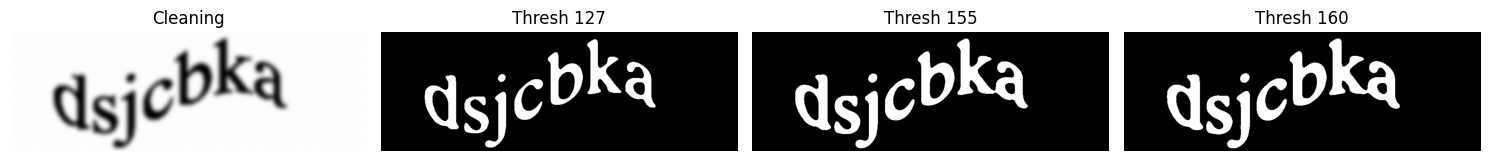

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

img_path = '/content/drive/MyDrive/image_pcd/Ocr/ocr3.jpg'

threshold_values = [127, 155, 160]
max_value = 0

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 8))

if img is None:
    print(f"Failed to load image: {img_path}")
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.text(0.5, 0.5, 'Image Not Found', horizontalalignment='center', verticalalignment='center')
    plt.title('Cleaning')
    plt.axis('off')

    for idx in range(len(threshold_values)):
        plt.subplot(1, len(threshold_values) + 1, idx + 2)
        plt.text(0.5, 0.5, 'Processing Skipped', horizontalalignment='center', verticalalignment='center')
        plt.title(f'Thresh {threshold_values[idx]}')
        plt.axis('off')

else:
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Cleaning')
    plt.axis('off')

    for idx, threshold_value in enumerate(threshold_values, 1):
        manual_thresh = np.zeros_like(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j] > threshold_value:
                    manual_thresh[i, j] = max_value
                else:
                    manual_thresh[i, j] = 255

        output_path = img_path.replace('.jpg', f'_thresh_{threshold_value}.jpg')
        try:
            cv2.imwrite(output_path, manual_thresh)
        except Exception as e:
            print(f"Failed to save processed image {output_path}: {e}")

        if threshold_value == 155:
            cv2.imwrite('saved_thresh3_155.jpg', manual_thresh)

        plt.subplot(1, len(threshold_values) + 1, idx + 1)
        plt.imshow(manual_thresh, cmap='gray')
        plt.title(f'Thresh {threshold_value}')
        plt.axis('off')

        ocr_img = manual_thresh
        if max_value == 0:
            ocr_img = cv2.bitwise_not(manual_thresh)

        ocr_img_bgr = cv2.cvtColor(ocr_img, cv2.COLOR_GRAY2BGR)
        results = reader.readtext(ocr_img_bgr)

        print(f"\n=== OCR Hasil dari {img_path} (Threshold: {threshold_value}) ===")
        if results:
            for (bbox, text, prob) in results:
                print(f"Text: {text}, Confidence: {prob:.2f}")
        else:
            print("No text detected.")

plt.tight_layout()
plt.show()


### **Citra 4**


=== OCR Hasil Dari /content/drive/MyDrive/image_pcd/Ocr/ocr4.jpg (Threshold: 127) ===
Text: AA, Confidence: 1.00

=== OCR Hasil Dari /content/drive/MyDrive/image_pcd/Ocr/ocr4.jpg (Threshold: 155) ===
Text: AAx U, Confidence: 0.48

=== OCR Hasil Dari /content/drive/MyDrive/image_pcd/Ocr/ocr4.jpg (Threshold: 160) ===
Text: AAx U, Confidence: 0.66


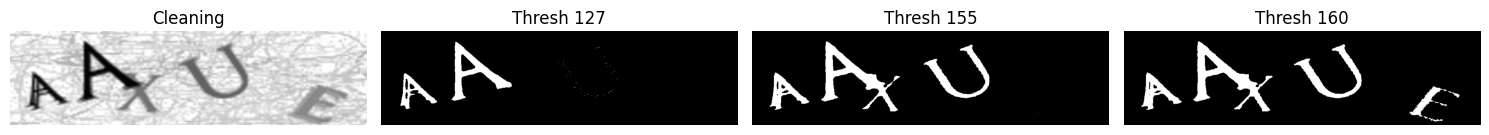

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import os

img_path = '/content/drive/MyDrive/image_pcd/Ocr/ocr4.jpg'

threshold_values = [127, 155, 160]
max_value = 0

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 8))

if img is None:
    print(f"Failed to load image: {img_path}")
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.text(0.5, 0.5, 'Image Not Found', horizontalalignment='center', verticalalignment='center')
    plt.title('Cleaning')
    plt.axis('off')

    for idx in range(len(threshold_values)):
        plt.subplot(1, len(threshold_values) + 1, idx + 2)
        plt.text(0.5, 0.5, 'Processing Skipped', horizontalalignment='center', verticalalignment='center')
        plt.title(f'Thresh {threshold_values[idx]}')
        plt.axis('off')

else:
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Cleaning')
    plt.axis('off')

    for idx, threshold_value in enumerate(threshold_values, 1):
        manual_thresh = np.zeros_like(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j] > threshold_value:
                    manual_thresh[i, j] = max_value
                else:
                    manual_thresh[i, j] = 255

        output_path = f'ocr4_thresh_{threshold_value}.jpg'
        try:
            cv2.imwrite(output_path, manual_thresh)
        except Exception as e:
            print(f"Failed to save processed image {output_path}: {e}")

        if threshold_value == 160:
            cv2.imwrite('saved_thresh4_160.jpg', manual_thresh)

        # Tampilkan hasil
        plt.subplot(1, len(threshold_values) + 1, idx + 1)
        plt.imshow(manual_thresh, cmap='gray')
        plt.title(f'Thresh {threshold_value}')
        plt.axis('off')

        ocr_img = manual_thresh
        if max_value == 0:
            ocr_img = cv2.bitwise_not(manual_thresh)

        ocr_img_bgr = cv2.cvtColor(ocr_img, cv2.COLOR_GRAY2BGR)
        results = reader.readtext(ocr_img_bgr)

        print(f"\n=== OCR Hasil Dari {img_path} (Threshold: {threshold_value}) ===")
        if results:
            for (bbox, text, prob) in results:
                print(f"Text: {text}, Confidence: {prob:.2f}")
        else:
            print("No text detected.")

plt.tight_layout()
plt.show()


### **Citra 5**


=== OCR Hasil dari Threshold 127 ===
No text detected.

=== OCR Hasil dari Threshold 155 ===
No text detected.

=== OCR Hasil dari Threshold 160 ===
Detected: 'H' with confidence 0.82


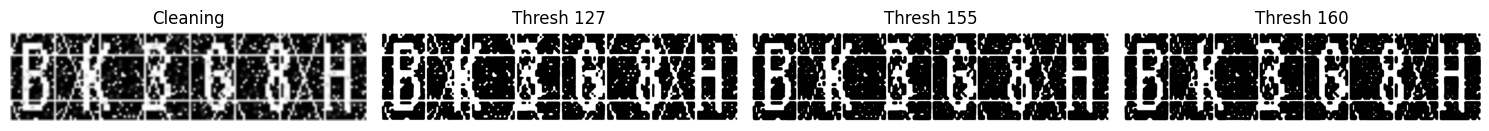

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
from PIL import Image
import os

img_path = '/content/drive/MyDrive/image_pcd/Ocr/ocr5.jpg'

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError(f"Gagal memuat gambar dari path: {img_path}")

img_resized = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img_denoised = cv2.fastNlMeansDenoising(img_resized, None, h=25, templateWindowSize=7, searchWindowSize=21)
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_denoised)
kernel = np.ones((3, 3), np.uint8)
img_morph = cv2.morphologyEx(img_clahe, cv2.MORPH_CLOSE, kernel, iterations=1)
img_erode = cv2.erode(img_morph, kernel, iterations=1)

threshold_values = [127, 155, 160]
max_value = 255

plt.figure(figsize=(15, 8))

plt.subplot(1, len(threshold_values) + 1, 1)
plt.imshow(img_erode, cmap='gray')
plt.title('Cleaning')
plt.axis('off')

for idx, thresh_val in enumerate(threshold_values, start=2):
    _, thresh_img = cv2.threshold(img_erode, thresh_val, max_value, cv2.THRESH_BINARY)

    plt.subplot(1, len(threshold_values) + 1, idx)
    plt.imshow(thresh_img, cmap='gray')
    plt.title(f'Thresh {thresh_val}')
    plt.axis('off')

    thresh_bgr = cv2.cvtColor(thresh_img, cv2.COLOR_GRAY2BGR)

    results = reader.readtext(thresh_bgr)

    print(f"\n=== OCR Hasil dari Threshold {thresh_val} ===")
    if results:
        for (bbox, text, conf) in results:
            print(f"Detected: '{text}' with confidence {conf:.2f}")
    else:
        print("No text detected.")

plt.tight_layout()
plt.show()


=== OCR Hasil dari Threshold 127 ===
No text detected.

=== OCR Hasil dari Threshold 155 ===
Detected: 'A' with confidence 0.56

=== OCR Hasil dari Threshold 160 ===
No text detected.


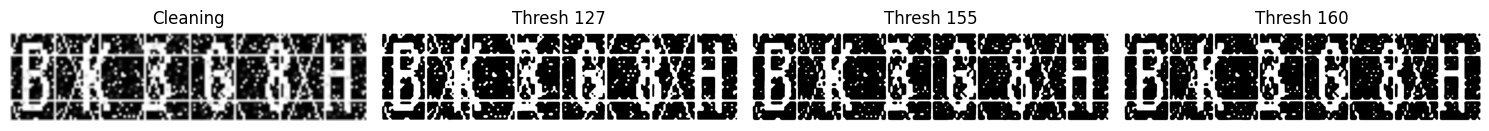

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
from PIL import Image
import os

img_path = '/content/drive/MyDrive/image_pcd/Ocr/ocr5.jpg'

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError(f"Gagal memuat gambar dari path: {img_path}")

img_resized = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img_denoised = cv2.fastNlMeansDenoising(img_resized, None, h=25, templateWindowSize=7, searchWindowSize=21)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_denoised)

threshold_values = [127, 155, 160]
max_value = 255

plt.figure(figsize=(15, 8))

plt.subplot(1, len(threshold_values) + 1, 1)
plt.imshow(img_clahe, cmap='gray')
plt.title('Cleaning')
plt.axis('off')

for idx, thresh_val in enumerate(threshold_values, start=2):
    _, thresh_img = cv2.threshold(img_clahe, thresh_val, max_value, cv2.THRESH_BINARY)

    plt.subplot(1, len(threshold_values) + 1, idx)
    plt.imshow(thresh_img, cmap='gray')
    plt.title(f'Thresh {thresh_val}')
    plt.axis('off')

    thresh_bgr = cv2.cvtColor(thresh_img, cv2.COLOR_GRAY2BGR)

    results = reader.readtext(thresh_bgr)

    print(f"\n=== OCR Hasil dari Threshold {thresh_val} ===")
    if results:
        for (bbox, text, conf) in results:
            print(f"Detected: '{text}' with confidence {conf:.2f}")
    else:
        print("No text detected.")

plt.tight_layout()
plt.show()


=== OCR Hasil dari Threshold 127 ===
Detected: 'BL' with confidence 0.82
Detected: '0' with confidence 0.13
Detected: '0' with confidence 0.38
Detected: '4' with confidence 0.78

=== OCR Hasil dari Threshold 155 ===
Detected: 'BL' with confidence 0.82
Detected: '0' with confidence 0.13
Detected: '0' with confidence 0.38
Detected: '4' with confidence 0.78

=== OCR Hasil dari Threshold 160 ===
Detected: 'BL' with confidence 0.82
Detected: '0' with confidence 0.13
Detected: '0' with confidence 0.38
Detected: '4' with confidence 0.78


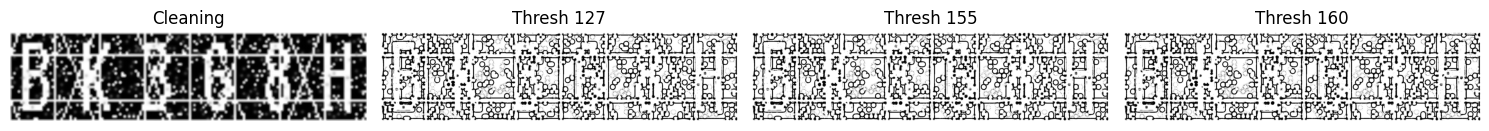

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
from PIL import Image
import os

img_path = '/content/drive/MyDrive/image_pcd/Ocr/ocr5.jpg'

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError(f"Gagal memuat gambar dari path: {img_path}")

img_resized = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img_denoised = cv2.fastNlMeansDenoising(img_resized, None, h=22, templateWindowSize=7, searchWindowSize=21)
clahe = cv2.createCLAHE(clipLimit=2.2, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_denoised)
kernel = np.ones((3, 3), np.uint8)
img_morph = cv2.morphologyEx(img_clahe, cv2.MORPH_CLOSE, kernel, iterations=1)

threshold_values = [127, 155, 160]
max_value = 255

plt.figure(figsize=(15, 8))

plt.subplot(1, len(threshold_values) + 1, 1)
plt.imshow(img_morph, cmap='gray')
plt.title('Cleaning')
plt.axis('off')

for idx, thresh_val in enumerate(threshold_values, start=2):
    thresh_img = cv2.adaptiveThreshold(img_morph, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

    plt.subplot(1, len(threshold_values) + 1, idx)
    plt.imshow(thresh_img, cmap='gray')
    plt.title(f'Thresh {thresh_val}')
    plt.axis('off')

    thresh_bgr = cv2.cvtColor(thresh_img, cv2.COLOR_GRAY2BGR)

    results = reader.readtext(thresh_bgr)

    print(f"\n=== OCR Hasil dari Threshold {thresh_val} ===")
    if results:
        for (bbox, text, conf) in results:
            print(f"Detected: '{text}' with confidence {conf:.2f}")
    else:
        print("No text detected.")

plt.tight_layout()
plt.show()


=== OCR Hasil dari /content/preprocessed_output.png (Threshold: 127) ===
Text: U, Confidence: 0.37

=== OCR Hasil dari /content/preprocessed_output.png (Threshold: 155) ===
Text: U, Confidence: 0.37

=== OCR Hasil dari /content/preprocessed_output.png (Threshold: 160) ===
Text: U, Confidence: 0.37


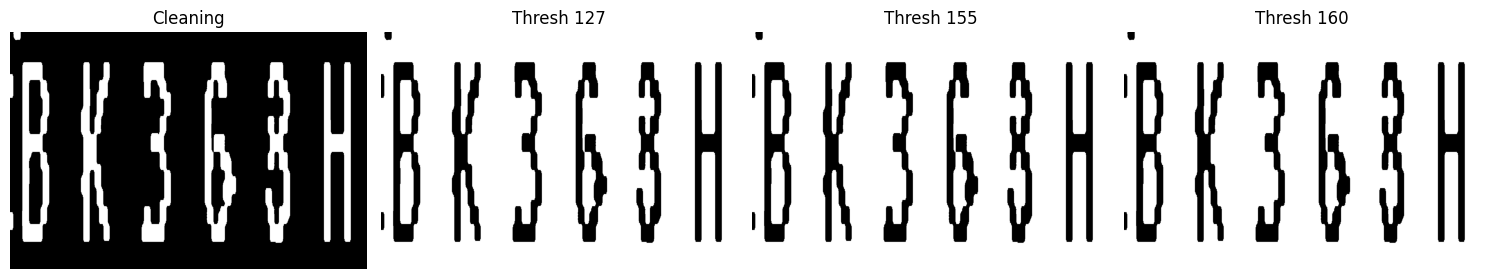

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

img_path = '/content/preprocessed_output.png'

threshold_values = [127, 155, 160]
max_value = 0

reader = easyocr.Reader(['en'], gpu=False)

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 8))

if img is None:
    print(f"Failed to load image: {img_path}")
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.text(0.5, 0.5, 'Image Not Found', horizontalalignment='center', verticalalignment='center')
    plt.title('Cleaning')
    plt.axis('off')

    for idx in range(len(threshold_values)):
         plt.subplot(1, len(threshold_values) + 1, idx + 2)
         plt.text(0.5, 0.5, 'Processing Skipped', horizontalalignment='center', verticalalignment='center')
         plt.title(f'Thresh {threshold_values[idx]}')
         plt.axis('off')

else:
    plt.subplot(1, len(threshold_values) + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Cleaning')
    plt.axis('off')

    for idx, threshold_value in enumerate(threshold_values, 1):
        manual_thresh = np.zeros_like(img)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j] > threshold_value:
                    manual_thresh[i, j] = max_value
                else:
                    manual_thresh[i, j] = 255


        output_path = img_path.replace('.jpg', f'_thresh_{threshold_value}.jpg')
        try:
            cv2.imwrite(output_path, manual_thresh)
        except Exception as e:
            print(f"Failed to save processed image {output_path}: {e}")


        plt.subplot(1, len(threshold_values) + 1, idx + 1)
        plt.imshow(manual_thresh, cmap='gray')
        plt.title(f'Thresh {threshold_value}')
        plt.axis('off')

        ocr_img = manual_thresh
        if max_value == 0:
             ocr_img = cv2.bitwise_not(manual_thresh)


        ocr_img_bgr = cv2.cvtColor(ocr_img, cv2.COLOR_GRAY2BGR)
        results = reader.readtext(ocr_img_bgr)

        print(f"\n=== OCR Hasil dari {img_path} (Threshold: {threshold_value}) ===")
        if results:
            for (bbox, text, prob) in results:
                print(f"Text: {text}, Confidence: {prob:.2f}")
        else:
            print("No text detected.")

plt.tight_layout()
plt.show()

# **ALGORITMA CNN**

In [ ]:
!pip install pytesseract
!pip install keras

In [41]:
# import os
# import cv2
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt

# # === LOAD ALPHABET AND NUMBER DATASET ===
# def load_alphabet_dataset(base_dir='/content/drive/MyDrive/image_pcd/Alphabet'):
#     X, y = [], []
#     for label in sorted(os.listdir(base_dir)):
#         folder = os.path.join(base_dir, label)
#         if os.path.isdir(folder):
#             for img_file in os.listdir(folder):
#                 img_path = os.path.join(folder, img_file)
#                 img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#                 if img is None:
#                     continue
#                 img = cv2.resize(img, (32, 32))
#                 X.append(img)
#                 y.append(label.upper() if label.isalpha() else label)
#     return np.array(X), np.array(y)

# # === TRAIN CNN MODEL (36 classes: A-Z, 0-9) ===
# def train_cnn_model():
#     X, y = load_alphabet_dataset()
#     X = X.astype('float32') / 255.0
#     X = X.reshape(-1, 32, 32, 1)

#     le = LabelEncoder()
#     y_encoded = le.fit_transform(y)
#     y_cat = to_categorical(y_encoded, num_classes=36)  # 26 letters + 10 digits

#     X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'),
#         BatchNormalization(),
#         MaxPooling2D(2, 2),
#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         MaxPooling2D(2, 2),
#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         MaxPooling2D(2, 2),
#         Flatten(),
#         Dense(512, activation='relu'),
#         Dropout(0.5),
#         Dense(36, activation='softmax')
#     ])

#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     early_stop = EarlyStopping(patience=5, restore_best_weights=True)
#     datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.15,
#         height_shift_range=0.15,
#         zoom_range=0.15,
#         shear_range=0.15,
#         brightness_range=[0.8, 1.2]
#     )

#     history = model.fit(
#         datagen.flow(X_train, y_train, batch_size=32),
#         validation_data=(X_test, y_test),
#         epochs=10,
#         callbacks=[early_stop],
#         verbose=1
#     )

#     loss, acc = model.evaluate(X_test, y_test, verbose=0)
#     print(f"Akurasi CNN pada data uji: {acc:.4f}")
#     return model, le

# # === PREPROCESS OCR IMAGE ===
# def preprocess_ocr_image(img_path):
#     img = cv2.imread(img_path)
#     if img is None:
#         return None, None

#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#     _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#     kernel = np.ones((3, 3), np.uint8)
#     cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
#     cleaned = cv2.dilate(cleaned, kernel, iterations=1)
#     laplacian = cv2.Laplacian(cleaned, cv2.CV_64F)
#     sharpened = cv2.convertScaleAbs(cleaned - 0.3 * laplacian)

#     output_path = img_path.replace('.jpg', '_processed.jpg')
#     cv2.imwrite(output_path, sharpened)
#     return img, sharpened

# # === SEGMENT CHARACTERS ===
# def segment_characters(img):
#     _, thresh = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY_INV)

#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     characters = []
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         area = cv2.contourArea(contour)
#         aspect_ratio = w / float(h)
#         if 30 < area < 3000 and 0.2 < aspect_ratio < 2.0 and w > 8 and h > 8:
#             char_img = img[y:y+h, x:x+w]
#             char_img = cv2.resize(char_img, (32, 32), interpolation=cv2.INTER_AREA)
#             characters.append((char_img, (x, y, w, h)))

#     print(f"Number of contours detected for {img_path}: {len(characters)}")
#     return characters

# # === DETECT CHARACTERS USING CNN WITH CONFIDENCE ===
# def detect_characters(model, le, characters):
#     detected_text = []
#     total_confidence = 0
#     char_count = 0

#     for char_img, _ in characters:
#         char_img = char_img.astype('float32') / 255.0
#         char_img = char_img.reshape(1, 32, 32, 1)
#         pred = model.predict(char_img, verbose=0)
#         confidence = np.max(pred)
#         if confidence > 0.5:
#             char_label = le.inverse_transform([np.argmax(pred)])[0]
#             detected_text.append(char_label)
#             total_confidence += confidence
#             char_count += 1

#     conf_score = total_confidence / char_count if char_count > 0 else 0
#     detected_text = ''.join(detected_text)
#     return detected_text, conf_score

# # === MAIN PROCESSING ===
# def main():
#     global model, le, img_path
#     model, le = train_cnn_model()

#     ocr_paths = [
#         '/content/drive/MyDrive/image_pcd/Ocr/ocr1.jpg',
#         '/content/drive/MyDrive/image_pcd/Ocr/ocr2.jpg',
#         '/content/drive/MyDrive/image_pcd/Ocr/ocr3.jpg',
#         '/content/drive/MyDrive/image_pcd/Ocr/ocr4.jpg',
#         '/content/drive/MyDrive/image_pcd/Ocr/ocr5.jpg'
#     ]

#     plt.figure(figsize=(15, 10))

#     for idx, img_path in enumerate(ocr_paths, 1):

#         original_img, processed_img = preprocess_ocr_image(img_path)
#         if processed_img is None:
#             print(f"Failed to load image: {img_path}")
#             continue

#         characters = segment_characters(processed_img)

#         detected_text, conf_score = detect_characters(model, le, characters)

#         plt.subplot(len(ocr_paths), 2, (idx-1)*2 + 1)
#         plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
#         plt.title(f'Original OCR {idx}')
#         plt.axis('off')

#         plt.subplot(len(ocr_paths), 2, (idx-1)*2 + 2)
#         plt.imshow(processed_img, cmap='gray')
#         plt.title(f'Processed OCR {idx}\nDetected: {detected_text}\nConfidence: {conf_score:.2f}')
#         plt.axis('off')

#         print(f"\n=== Detected Text for {img_path} ===")
#         print(f"Text: {detected_text if detected_text else 'No text detected'}")
#         print(f"Confidence Score: {conf_score:.2f}")
#         print(f"Number of characters segmented: {len(characters)}")  # Debug output

#     plt.tight_layout()
#     plt.show()

# if __name__ == "__main__":
#     main()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


326/326 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.0465 - loss: 4.5226 - val_accuracy: 0.1051 - val_loss: 3.4280
Epoch 2/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.0525 - loss: 3.3129 - val_accuracy: 0.1634 - val_loss: 2.9832
Epoch 3/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.0507 - loss: 3.2653 - val_accuracy: 0.1772 - val_loss: 2.8259
Epoch 4/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.0616 - loss: 3.2275 - val_accuracy: 0.1853 - val_loss: 2.8615
Epoch 5/10


KeyboardInterrupt: 

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.3022 - loss: 2.6715 - val_accuracy: 0.1649 - val_loss: 3.0570
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.6190 - loss: 1.3326 - val_accuracy: 0.5355 - val_loss: 1.7500
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.6937 - loss: 1.0933 - val_accuracy: 0.7418 - val_loss: 0.9711
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.7088 - loss: 1.0326 - val_accuracy: 0.8002 - val_loss: 0.7350
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.7479 - loss: 0.8940 - val_accuracy: 0.7990 - val_loss: 0.7342
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.7481 - loss: 0.8787 - val_accuracy: 0.7982 - val_loss: 0.7379
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.7571 - loss: 0.8444 - val_accuracy: 0.7936 - val_loss: 0.7791
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.7630 - loss: 0.8218 - val_accura

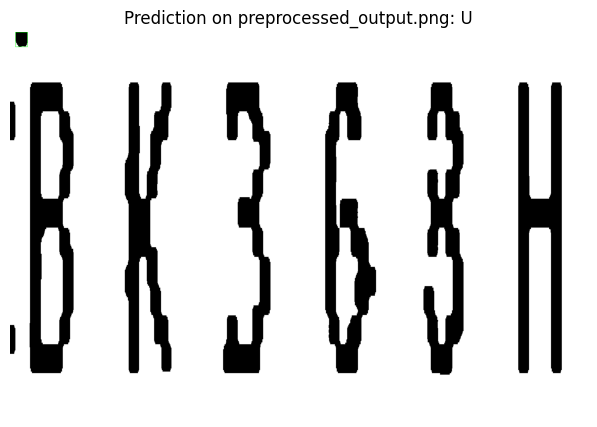

preprocessed_output.png -> Prediksi huruf: ['U']


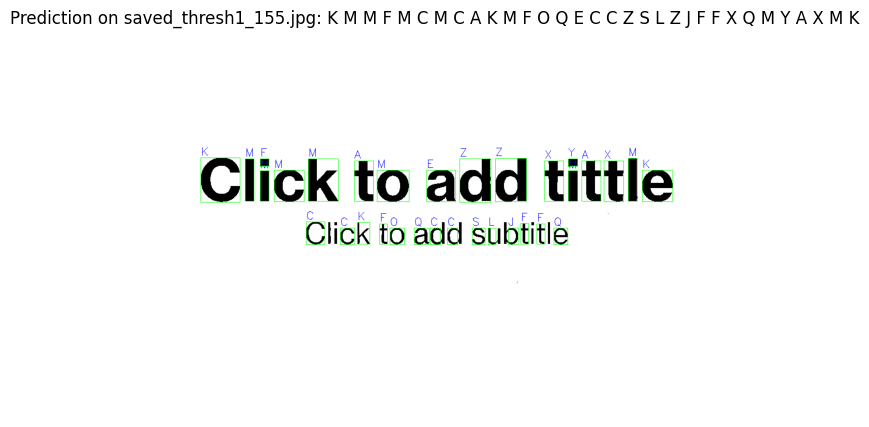

saved_thresh1_155.jpg -> Prediksi huruf: ['K', 'M', 'M', 'F', 'M', 'C', 'M', 'C', 'A', 'K', 'M', 'F', 'O', 'Q', 'E', 'C', 'C', 'Z', 'S', 'L', 'Z', 'J', 'F', 'F', 'X', 'Q', 'M', 'Y', 'A', 'X', 'M', 'K']


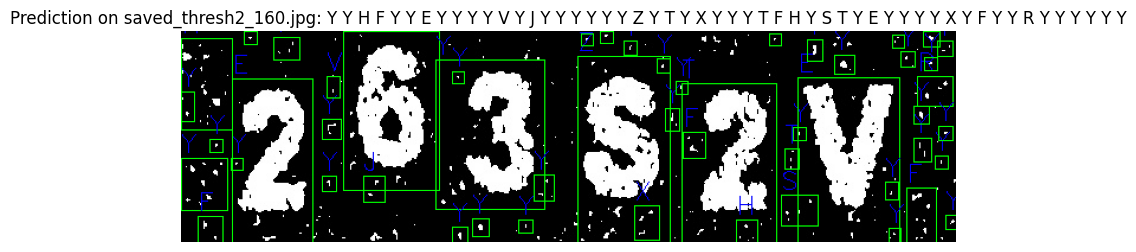

saved_thresh2_160.jpg -> Prediksi huruf: ['Y', 'Y', 'H', 'F', 'Y', 'Y', 'E', 'Y', 'Y', 'Y', 'Y', 'V', 'Y', 'J', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Z', 'Y', 'T', 'Y', 'X', 'Y', 'Y', 'Y', 'T', 'F', 'H', 'Y', 'S', 'T', 'Y', 'E', 'Y', 'Y', 'Y', 'Y', 'X', 'Y', 'F', 'Y', 'Y', 'R', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']


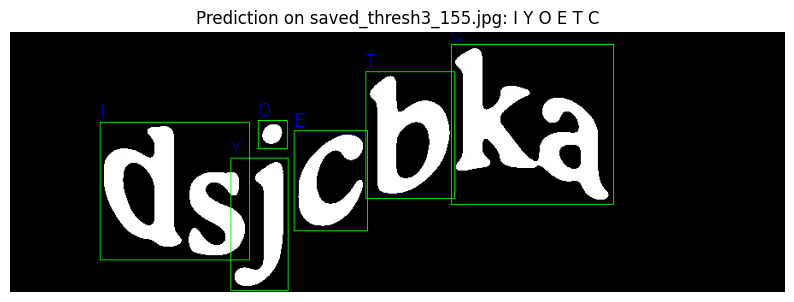

saved_thresh3_155.jpg -> Prediksi huruf: ['I', 'Y', 'O', 'E', 'T', 'C']


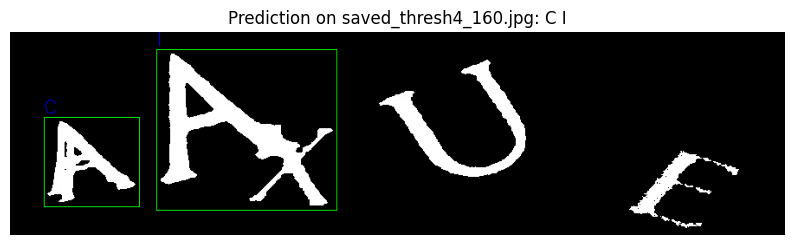

saved_thresh4_160.jpg -> Prediksi huruf: ['C', 'I']


In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === LOAD DATASET CNN ===
def load_alphabet_dataset(base_dir='/content/drive/MyDrive/image_pcd/Alphabet'):
    X, y = [], []
    for label in sorted(os.listdir(base_dir)):
        folder = os.path.join(base_dir, label)
        if os.path.isdir(folder):
            for img_file in os.listdir(folder):
                img_path = os.path.join(folder, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, (32, 32))
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# === PREPROCESSING SEGMENTASI LEBIH BAIK ===
def preprocess_for_segmentation(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    thresh = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    clean = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, kernel, iterations=1)

    return clean

# === FUNSI PADDING & DESKEW SEDERHANA UNTUK ROI ===
def deskew_and_pad(img, size=32):
    moments = cv2.moments(img)
    if abs(moments['mu02']) < 1e-2:
        return resize_and_pad(img, size)
    skew = moments['mu11'] / moments['mu02']
    M = np.float32([[1, skew, -0.5 * size * skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (size, size), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)

    return resize_and_pad(img, size)

def resize_and_pad(img, size=32):
    h, w = img.shape
    scale = size / max(h, w)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(img, (new_w, new_h))

    padded = np.zeros((size, size), dtype=np.uint8)
    x_offset = (size - new_w) // 2
    y_offset = (size - new_h) // 2
    padded[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized

    return padded

# === LATIH MODEL CNN YANG LEBIH DALAM + AUGMENTASI ===
X, y = load_alphabet_dataset()
X = X.astype('float32') / 255.0
X = X.reshape(-1, 32, 32, 1)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stop]
)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi CNN pada data uji: {acc:.4f}")

# === FUNGSI PREDIKSI DARI GAMBAR OCR DENGAN PREPROCESSING SEGMENTASI ===
def segment_and_predict_ocr(image_path, model, label_encoder):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Gagal membuka gambar: {image_path}")
        return []

    thresh = preprocess_for_segmentation(img)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    predictions = []
    for cnt in sorted(contours, key=lambda x: cv2.boundingRect(x)[0]):
        x, y, w, h = cv2.boundingRect(cnt)

        if w * h < 100:
            continue
        aspect_ratio = w / h
        if aspect_ratio < 0.2 or aspect_ratio > 1.2:
            continue

        roi = thresh[y:y + h, x:x + w]
        roi = deskew_and_pad(roi, 32)
        roi = roi.astype('float32') / 255.0
        roi = roi.reshape(1, 32, 32, 1)

        pred_idx = np.argmax(model.predict(roi, verbose=0))
        pred_label = str(label_encoder.inverse_transform([pred_idx])[0])
        predictions.append(pred_label)

        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.putText(img, pred_label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1)

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Prediction on {os.path.basename(image_path)}: {" ".join(predictions)}')
    plt.axis('off')
    plt.show()

    output_dir = '/content/drive/MyDrive/image_pcd/Output'
    os.makedirs(output_dir, exist_ok=True)
    save_path = os.path.join(output_dir, f'predicted_{os.path.basename(image_path)}')
    cv2.imwrite(save_path, img)

    return predictions

# === UJI PREDIKSI PADA SEMUA GAMBAR OCR ===
ocr_folder = '/content/drive/MyDrive/image_pcd/CNN'
ocr_files = sorted([f for f in os.listdir(ocr_folder) if f.endswith(('.jpg', '.png'))])

for file in ocr_files:
    full_path = os.path.join(ocr_folder, file)
    preds = segment_and_predict_ocr(full_path, model, le)
    preds = [str(p) for p in preds]
    print(f"{file} -> Prediksi huruf:", preds)
